# DNA Melting Temperature Analysis Notebook

In this notebook, you will read in your data from a simplified CSV file and process it in order to determine the melting temperatures and errors of the melting temperatures for different concentrations of dsDNA. This data will then be used in a second step by you to determine the enthalpy and entropy of the reaction (not done in this notebook).

**BEFORE YOU START:**
Format your data! In order to use this tool, your data **must be in CSV format** with the temperatures in the first column, and the absorbance for each trial in subsequent columns. You do not need to include the data for the blank, just the samples that contained a finite concentration of dsDNA.

In [ ]:
# Import needed libraries for data analysis
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from google.colab import files

# Helper Functions & Fundamental Constants
Execute this group of cells to prepare the Helper Functions for data analysis.

**You should not be modifying anything in this section!**

This section contains useful functions and constants to accomplish the goals of the notebook.

In [ ]:
# Sigmoidal function definition
def sigmoid(T, c0, c1, c2, c3):
    return c0 + c1 * np.tanh((T - c2) / c3)

# Load data into DataFrame
def load_data(filename):
    df = pd.read_csv(filename, header=None, names=['temp', 'trial1', 'trial2'])
    return df

# Normalize absorbance data and compute average
def preprocess_data(df):
    df['norm_trial1'] = df['trial1'] / df['trial1'].max()
    df['norm_trial2'] = df['trial2'] / df['trial2'].max()
    df['avg_absorbance'] = (df['norm_trial1'] + df['norm_trial2']) / 2
    return df

# Perform curve fitting for each concentration group
def fit_sigmoid(df):
    concentrations = []
    c2_values = []
    c2_errors = []

    for i in range(6):
        subset = df.iloc[i*10:(i+1)*10]
        temperatures = subset['temp']
        absorbances = subset['avg_absorbance']

        # Initial parameter guesses
        initial_params = [0, 1, 30, 1]  # c0, c1, c2, c3

        # Fit the curve
        popt, pcov = curve_fit(sigmoid, temperatures, absorbances, p0=initial_params)
        c2, c2_error = popt[2], np.sqrt(np.diag(pcov))[2]

        # Concentration calculation
        # Beer’s law: A = ε * c * l, where l = 1 cm, ε = 135092.6
        A0 = subset.iloc[0]['trial1']  # Unnormalized absorbance at lowest temperature
        concentration = A0 / 135092.6

        concentrations.append(concentration * 1e6)  # Convert to micromolar
        c2_values.append(c2)
        c2_errors.append(c2_error)

    return concentrations, c2_values, c2_errors

# Plot the average absorbance for each trial
def plot_avg_absorbance(df):
  # Create the figure outside the loop
  plt.figure(figsize=(8, 6))

  # Iterate through the dataframe in chunks of 10 rows for the 10 temperatures per sample
  for i in range(0, len(df), 10):
      # Slice the dataframe to get 10 rows at a time
      chunk = df.iloc[i:i+10]

      # Plot each chunk on the same figure, but normalize each trial separately
      plt.plot(chunk['temp'], chunk['avg_absorbance']/np.max(chunk['avg_absorbance']), marker='o', linestyle='-', label=f'Sample {i//10 +1}')

  # Customize the plot
  plt.xlabel('Temperature')
  plt.ylabel('Normalized Average Absorbance')
  plt.title('Temperature vs. Normalized Avg Absorbance for all samples')
  plt.legend()
  plt.show()

# Instructions

Execute the cells below to perform the nonlinear fitting of the absorbance vs temperature data collected during your experiment. The final output should be a summary of the concentrations and melting points (with uncertainties) for each data set.

# Import Experimental Data - CSV

Execute the cell below, select the data file you wish to analyze, and then proceed with the subsequent steps.

In [ ]:
# Step 1: Upload data file
uploaded = files.upload()

# Step 2: Retrieve the file name
file_name = list(uploaded.keys())[0]

# Step 3: Print the file name
print(f"Uploaded file name: {file_name}")

Saving dna_data_col1_2.csv to dna_data_col1_2.csv
Uploaded file name: dna_data_col1_2.csv


# Create DataFrame, preprocess the data, plot the normalized absorbance vs temperature data

Execute the cell below in order to normalize and average your two trials into a single set of data for each concentration of dsDNA.

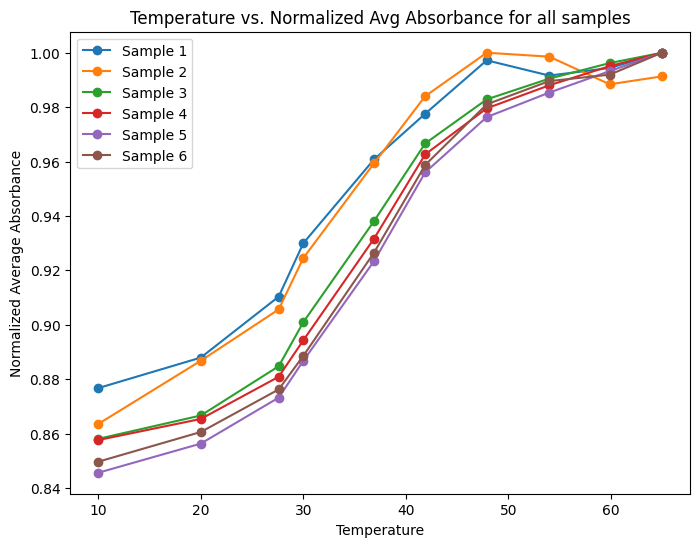

In [ ]:
# Step 4: Create DataFrame
df = load_data(file_name)

# Step 5: preprocess the data
df = preprocess_data(df)

# Step 6: Plot the normalized, average absorbance
plot_avg_absorbance(df)

# Fit the data to a sigmoidal function, summarize concentrations & melting temperatures

Execute the cell below in order to perform a nonlinear fit of the normalized absorbance data according to the general form:

$A(T) = c_0 + c_1  \tanh(\frac{T - c_2}{c_3})$

where $c_i$ are the fit constants and $T$ is the independent variable (the temperature).

In this fit, the value of $c_2$ corresponds to the melting temperature $T_m$ for a given concentration, and the uncertainty of $c_2$ to the uncertainty of $T_m$.

In [ ]:
# Step 7: Fit the sigmoid for each data set
concentrations, tm_values, tm_errors = fit_sigmoid(df)

# Step 8: Print a summary of the fits.
# Print summary
for i, (conc, tm, tm_err) in enumerate(zip(concentrations, tm_values, tm_errors)):
    print(f"Concentration for data set {i+1}: {conc:.4f} µM")
    print(f"Melting temperature for data set {i+1}: {c2:.4f} ± {c2_err:.4f} °C")
    print()

Concentration for data set 1: 1.1474 µM
Melting temperature for data set 1: 36.1804 ± 0.3866 °C

Concentration for data set 2: 2.1911 µM
Melting temperature for data set 2: 36.1804 ± 0.3866 °C

Concentration for data set 3: 3.2570 µM
Melting temperature for data set 3: 36.1804 ± 0.3866 °C

Concentration for data set 4: 4.4858 µM
Melting temperature for data set 4: 36.1804 ± 0.3866 °C

Concentration for data set 5: 5.4777 µM
Melting temperature for data set 5: 36.1804 ± 0.3866 °C

Concentration for data set 6: 6.6029 µM
Melting temperature for data set 6: 36.1804 ± 0.3866 °C

